In [1]:
%matplotlib inline


import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from scipy.interpolate import interp1d

##Question 2

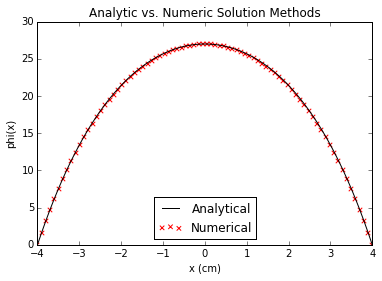

In [142]:
a_q2=4
D_q2=1
Sigma_a_q2=.2
S_q2=8
h_q2=.1
L2_q2=D_q2/Sigma_a_q2
def matrix_construction(h,L2,a,S,D):
    n=np.int(2*a/h)
    A=np.zeros((n,n))
    flux=np.zeros((n,1))
    source=np.zeros((n,1))+S*h**2/D
    for i in range(len(flux)):  
        if i==0:
            A[i,i]=2+h**2/L2
            A[i,i+1]=-1
        elif i==n-1:
            A[i,i]=2+h**2/L2
            A[i,i-1]=-1
        else:
            A[i,i]=2+h**2/L2
            A[i,i-1]=-1
            A[i,i+1]=-1
    return A,source,flux,n

def thomas_alg(A,source,flux,n):
    T=A
    b=source
    i=1
    while i <= n-1:  
        T[i,i]=T[i,i]-T[i,i-1]*T[i-1,i]/T[i-1,i-1]
        b[i]=b[i]-T[i,i-1]*b[i-1]/T[i-1,i-1]
        i=i+1
    #flux[n-2]=b[n-2]/T[n-2,n-2]
    i=n-2   
    while i >= (n-1)/2:
        flux[i]=(b[i]-T[i,i+1]*flux[i+1])/T[i,i]
        i=i-1
    i=0
    while i <= (n-1)/2:
        flux[i]=flux[n-1-i]
        i=i+1
    return flux


A_q2,source_q2,flux_q2,n_q2=matrix_construction(h_q2,L2_q2,a_q2,S_q2,D_q2)
flux_q2=thomas_alg(A_q2,source_q2,flux_q2,n_q2)


def analytical_soln(x):
    return S_q2/Sigma_a_q2*(1-np.cosh(x/np.sqrt(L2_q2))/np.cosh(a_q2/np.sqrt(L2_q2)))
plt.scatter(np.linspace(-4,4,n_q2),flux_q2,marker='x',lw=1,color='red')
plt.plot(np.linspace(-4,4,n_q2),analytical_soln(np.linspace(-4,4,n_q2)),color='black')
plt.axis([-4,4,0,30])
plt.title('Analytic vs. Numeric Solution Methods')
plt.xlabel('x (cm)')
plt.ylabel('phi(x)')
plt.legend(('Analytical','Numerical'),loc=8)
plt.show()

In [144]:
print(flux_q2)

[[  0.        ]
 [  1.65200606]
 [  3.22731613]
 [  4.72908083]
 [  6.16030369]
 [  7.52384716]
 [  8.82243833]
 [ 10.05867437]
 [ 11.23502776]
 [ 12.3538512 ]
 [ 13.41738235]
 [ 14.42774827]
 [ 15.38696968]
 [ 16.29696502]
 [ 17.1595543 ]
 [ 17.97646269]
 [ 18.749324  ]
 [ 19.47968396]
 [ 20.16900329]
 [ 20.81866063]
 [ 21.42995528]
 [ 22.00410985]
 [ 22.54227264]
 [ 23.04551997]
 [ 23.51485834]
 [ 23.95122643]
 [ 24.35549697]
 [ 24.72847851]
 [ 25.070917  ]
 [ 25.38349733]
 [ 25.66684465]
 [ 25.92152566]
 [ 26.14804972]
 [ 26.34686988]
 [ 26.51838378]
 [ 26.66293445]
 [ 26.78081099]
 [ 26.87224915]
 [ 26.93743181]
 [ 26.97648933]
 [ 26.97648933]
 [ 26.93743181]
 [ 26.87224915]
 [ 26.78081099]
 [ 26.66293445]
 [ 26.51838378]
 [ 26.34686988]
 [ 26.14804972]
 [ 25.92152566]
 [ 25.66684465]
 [ 25.38349733]
 [ 25.070917  ]
 [ 24.72847851]
 [ 24.35549697]
 [ 23.95122643]
 [ 23.51485834]
 [ 23.04551997]
 [ 22.54227264]
 [ 22.00410985]
 [ 21.42995528]
 [ 20.81866063]
 [ 20.16900329]
 [ 19.47

##Question 3

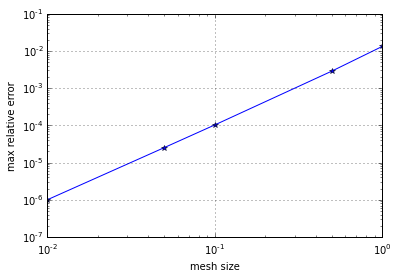

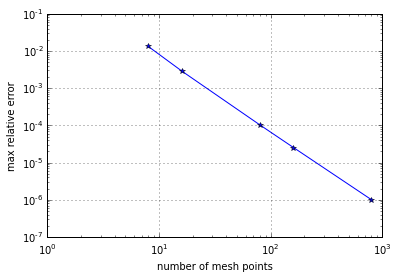

In [170]:
h_q3a=1
h_q3b=.5
h_q3c=.1
h_q3d=.05
h_q3e=.01

mesh_size=np.array([h_q3a,h_q3b,h_q3c,h_q3d,h_q3e])

def max_error(flux_a,flux_n,n):
    error=np.zeros((n,1))
    for i in range(n):
         error[i]=(flux_a[i]-flux_n[i])
    error=error/np.sum(flux_a)
    return np.amax(error)

A_q3a,source_q3a,flux_q3a,n_q3a=matrix_construction(h_q3a,L2_q2,a_q2,S_q2,D_q2)
flux_q3a=thomas_alg(A_q3a,source_q3a,flux_q3a,n_q3a)

A_q3b,source_q3b,flux_q3b,n_q3b=matrix_construction(h_q3b,L2_q2,a_q2,S_q2,D_q2)
flux_q3b=thomas_alg(A_q3b,source_q3b,flux_q3b,n_q3b)

A_q3c,source_q3c,flux_q3c,n_q3c=matrix_construction(h_q3c,L2_q2,a_q2,S_q2,D_q2)
flux_q3c=thomas_alg(A_q3c,source_q3c,flux_q3c,n_q3c)

A_q3d,source_q3d,flux_q3d,n_q3d=matrix_construction(h_q3d,L2_q2,a_q2,S_q2,D_q2)
flux_q3d=thomas_alg(A_q3d,source_q3d,flux_q3d,n_q3d)

A_q3e,source_q3e,flux_q3e,n_q3e=matrix_construction(h_q3e,L2_q2,a_q2,S_q2,D_q2)
flux_q3e=thomas_alg(A_q3e,source_q3e,flux_q3e,n_q3e)

mesh_num=np.array([n_q3a,n_q3b,n_q3c,n_q3d,n_q3e])

error_q3=np.array([max_error(analytical_soln(np.linspace(-4,4,n_q3a)),flux_q3a,n_q3a),
                  max_error(analytical_soln(np.linspace(-4,4,n_q3b)),flux_q3b,n_q3b),
                  max_error(analytical_soln(np.linspace(-4,4,n_q3c)),flux_q3c,n_q3c),
                  max_error(analytical_soln(np.linspace(-4,4,n_q3d)),flux_q3d,n_q3d),
                  max_error(analytical_soln(np.linspace(-4,4,n_q3e)),flux_q3e,n_q3e)])

plt.loglog(mesh_size,error_q3,marker='*')
plt.grid()
plt.ylabel('max relative error')
plt.xlabel('mesh size')
plt.axis([1e-2,1,1e-7,1e-1])
plt.show()
plt.loglog(mesh_num,error_q3,marker='*')
plt.grid()
plt.ylabel('max relative error')
plt.xlabel('number of mesh points')
plt.axis([1,1e3,1e-7,1e-1])
plt.show()

##Question 4

In [97]:
nuSigmaf=.6
Sigma_a_q4=.7
a_q4=4
D_q4=1
h_q4=.1
n_q4=2*a_q4/h_q4+1
F=np.identity(n_q4)*nuSigmaf
A_q4=np.zeros((n_q4,n_q4))
for i in range(np.int(n_q4)):
    A_q4[i,i]=2*D_q4/h_q4**2+Sigma_a_q4
    if i==0:
        A_q4[i,i+1]=-D_q4/h_q4**2
    elif i==n_q4-1:
        A_q4[i,i-1]=-D_q4/h_q4**2
    else:
        A_q4[i,i-1]=-D_q4/h_q4**2
        A_q4[i,i+1]=-D_q4/h_q4**2

def GS(A,b,x):
    x_k1=np.zeros((len(b),1))
    for i in range(len(b)):        
        if i==0:
#            x_k1[i]=1/A[i,i]*(b[i]-A[i,i+1]*x[i+1])
            x_k1[i]=0
        elif i==(len(b)-1):
#            x_k1[i]=1/A[i,i]*(b[i]-A[i,i-1]*x_k1[i-1])
            x_k1[i]=0
        else:
            x_k1[i]=1/A[i,i]*(b[i]-A[i,i-1]*x_k1[i-1]-A[i,i+1]*x[i+1])
    return x_k1        

tolerance=10e-6
flux_new=np.zeros((n_q4,1))+1
flux_new[0]=0
flux_new[n_q4-1]=0
flux_new=flux_new/np.linalg.norm(flux_new)
Q_new=np.dot(F,flux_new)
k_new=1
error_flux = 1000  #initialize error
error_k=1000
iterations=1
while error_flux>=tolerance and error_k>=tolerance:
    flux_old=flux_new
    Q_old=Q_new
    k_old=k_new
    if error_flux>tolerance and error_k>tolerance:
        flux_new=GS(A_q4,(1/k_old)*Q_old,flux_old)
        flux_new=flux_new/np.sqrt(np.sum(flux_new**2))
        Q_new=np.dot(F,flux_new)
        k_new=k_old*np.sum(Q_new)/np.sum(Q_old)
        iterations=iterations+1
    else:
        flux_new=flux_new
        iterations=iterations
    error_flux=np.linalg.norm((flux_new-flux_old))/np.linalg.norm(flux_new)
    error_k=np.abs((k_new-k_old)/k_new)
    if iterations>=1000:
        error_flux=0
        error_k=0
        print(iterations)

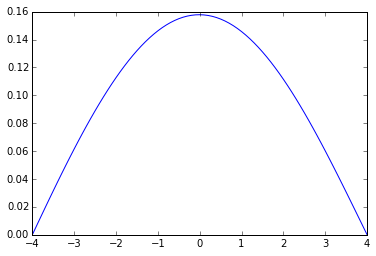

400
0.906532163866


In [171]:
plt.plot(np.linspace(-4,4,n_q4),flux_new)
plt.show()
print(iterations)
print(k_new)

In [99]:
print(flux_new)

[[ 0.        ]
 [ 0.00636861]
 [ 0.012715  ]
 [ 0.01902933]
 [ 0.02530187]
 [ 0.03152299]
 [ 0.03768319]
 [ 0.04377312]
 [ 0.04978362]
 [ 0.05570568]
 [ 0.0615305 ]
 [ 0.06724951]
 [ 0.07285435]
 [ 0.07833687]
 [ 0.08368921]
 [ 0.08890373]
 [ 0.09397306]
 [ 0.0988901 ]
 [ 0.10364801]
 [ 0.10824023]
 [ 0.11266048]
 [ 0.11690275]
 [ 0.12096133]
 [ 0.12483077]
 [ 0.12850592]
 [ 0.1319819 ]
 [ 0.1352541 ]
 [ 0.13831823]
 [ 0.14117023]
 [ 0.14380636]
 [ 0.14622314]
 [ 0.14841737]
 [ 0.15038614]
 [ 0.1521268 ]
 [ 0.15363699]
 [ 0.15491464]
 [ 0.15595795]
 [ 0.15676542]
 [ 0.15733584]
 [ 0.15766827]
 [ 0.1577621 ]
 [ 0.157617  ]
 [ 0.15723297]
 [ 0.15661029]
 [ 0.15574959]
 [ 0.15465181]
 [ 0.15331823]
 [ 0.15175046]
 [ 0.14995047]
 [ 0.14792055]
 [ 0.14566336]
 [ 0.14318194]
 [ 0.14047967]
 [ 0.1375603 ]
 [ 0.13442796]
 [ 0.13108714]
 [ 0.12754271]
 [ 0.12379991]
 [ 0.11986436]
 [ 0.11574204]
 [ 0.11143928]
 [ 0.10696278]
 [ 0.10231959]
 [ 0.09751709]
 [ 0.092563  ]
 [ 0.08746534]
 [ 0.08223